# Lab 8

# Installing Packages

In [ ]:
install.packages(c('arules', 'arulesViz'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [ ]:
library(arules)
library(arulesViz)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




# Dataset

Consider the data below.

In [ ]:
dataset.toy = list(
  c('Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'),
  c('Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'),
  c('Milk', 'Apple', 'Kidney Beans', 'Eggs'),
  c('Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'),
  c('Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'),
  c('Chicken Soup', 'Tomatoes', 'Onion', 'Butter', 'Salt', 'Potatoes'),
  c('Lettuce', 'Tomatoes', 'Onion', 'Eggs')
  )

This data represents the list of products purchased by five clients in a grocery store.

## Recap: Association Rule Mining

From [mlxtend > Association Rules > Overview](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) we have:

> Rule generation is a common task in the mining of frequent patterns. An association rule is an implication expression of the form $X→Y$, where $X$ and $Y$ are disjoint itemsets. A more concrete example based on consumer behaviour would be $\{Diapers\}→\{Beer\}$ suggesting that people who buy diapers are also likely to buy beer. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the `confidence` and `lift` metrics.
>
> **Metrics**
>
>- **Support**
>
> $$ \text{support}(A→C)=\text{support}(A∪C), \quad \text{range:} [0,1] $$
>
>The support metric is defined for itemsets, not assocication rules. The table produced by the association rule mining algorithm contains three different support metrics: `antecedent support`, `consequent support`, and `support`. Here, `antecedent support` computes the proportion of transactions that contain the antecedent $A$, and `consequent support` computes the support for the itemset of the consequent $C$. The `support` metric then computes the support of the combined itemset $A ∪ C$ -- note that `support` depends on `antecedent support` and `consequent support` via min(`antecedent support`, `consequent support`).
>
>Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold. Note that in general, due to the downward closure property, all subsets of a frequent itemset are also frequent.
>
> - **Confidence**'
>
> $$\text{confidence}(A→C)=\frac{\text{support}(A→C)}{\text{support}(A)},\quad \text{range:} [0,1]$$
>
> The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.
>
> - **Lift**:
>
> $$\text{lift}(A→C)=\frac{\text{confidence}(A→C)}{\text{support}(C)},\quad \text{range:} [0,∞]$$
> 
> The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule $A->C$ occur together than we would expect if they were statistically independent. If $A$ and $C$ are independent, the Lift score will be exactly $1$.
> 
> - **Leverage**:
> 
> $$\text{levarage}(A→C)=\text{support}(A→C)−\text{support}(A)×\text{support}(C),\quad \text{range:} [−1,1]$$
> 
> The leverage computes the difference between the observed frequency of $A$ and $C$ appearing together and the frequency that would be expected if $A$ and $C$ were independent. An leverage value of $0$ indicates independence.
> 
> - **Conviction**:
> 
> $$\text{conviction}(A→C)=\frac{1−\text{support}(C)}{1−\text{confidence}(A→C)}, \quad \text{range:} [0,∞]$$
> 
> A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes $0$ (due to $1 - 1$) for which the conviction score is defined as 'inf'. Similar to Lift, if items are independent, the conviction is $1$.

## Task 1

In [ ]:
dataset.toy

[[1]]
[1] "Milk"         "Onion"        "Nutmeg"       "Kidney Beans" "Eggs"        
[6] "Yogurt"      

[[2]]
[1] "Dill"         "Onion"        "Nutmeg"       "Kidney Beans" "Eggs"        
[6] "Yogurt"      

[[3]]
[1] "Milk"         "Apple"        "Kidney Beans" "Eggs"        

[[4]]
[1] "Milk"         "Unicorn"      "Corn"         "Kidney Beans" "Yogurt"      

[[5]]
[1] "Corn"         "Onion"        "Onion"        "Kidney Beans" "Ice cream"   
[6] "Eggs"        

[[6]]
[1] "Chicken Soup" "Tomatoes"     "Onion"        "Butter"       "Salt"        
[6] "Potatoes"    

[[7]]
[1] "Lettuce"  "Tomatoes" "Onion"    "Eggs"

**Task**: Convert the given dataset into `transactions`. Use the `as` function.

In [ ]:
# Write your code here


Warning message in asMethod(object):
“removing duplicated items in transactions”




**Task**: `print` the transactions. You will get the number of transactions and the number of items.

In [ ]:
# Write your code here


transactions in sparse format with
 7 transactions (rows) and
 17 items (columns)

**Task**: Check the summary of the transactions.

In [ ]:
# Write your code here


transactions as itemMatrix in sparse format with
 7 rows (elements/itemsets/transactions) and
 17 columns (items) and a density of 0.302521 

most frequent items:
        Eggs Kidney Beans        Onion         Milk       Yogurt      (Other) 
           5            5            5            3            3           15 

element (itemset/transaction) length distribution:
sizes
4 5 6 
2 2 3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.500   5.000   5.143   6.000   6.000 

includes extended item information - examples:
        labels
1        Apple
2       Butter
3 Chicken Soup

**Task**: Use the `arules::item*` functions to print the labels of the items.

In [ ]:
# Write your code here

labels <- 

 [1] "Apple"        "Butter"       "Chicken Soup" "Corn"         "Dill"        
 [6] "Eggs"         "Ice cream"    "Kidney Beans" "Lettuce"      "Milk"        
[11] "Nutmeg"       "Onion"        "Potatoes"     "Salt"         "Tomatoes"    
[16] "Unicorn"      "Yogurt"      


**Task**: Use the `arules::item*` functions to print the (relative) frequency of the items.

In [ ]:
# Write your code here



       Apple       Butter Chicken Soup         Corn         Dill         Eggs 
   0.1428571    0.1428571    0.1428571    0.2857143    0.1428571    0.7142857 
   Ice cream Kidney Beans      Lettuce         Milk       Nutmeg        Onion 
   0.1428571    0.7142857    0.1428571    0.4285714    0.2857143    0.7142857 
    Potatoes         Salt     Tomatoes      Unicorn       Yogurt 
   0.1428571    0.1428571    0.2857143    0.1428571    0.4285714 


**Task**: Use the `arules::item*` functions to print the absolute frequency of the items.

In [ ]:
# Write your code here


       Apple       Butter Chicken Soup         Corn         Dill         Eggs 
           1            1            1            2            1            5 
   Ice cream Kidney Beans      Lettuce         Milk       Nutmeg        Onion 
           1            5            1            3            2            5 
    Potatoes         Salt     Tomatoes      Unicorn       Yogurt 
           1            1            2            1            3 


**Task**: Use the `arules::item*` functions to plot the (relative) frequency of the items.

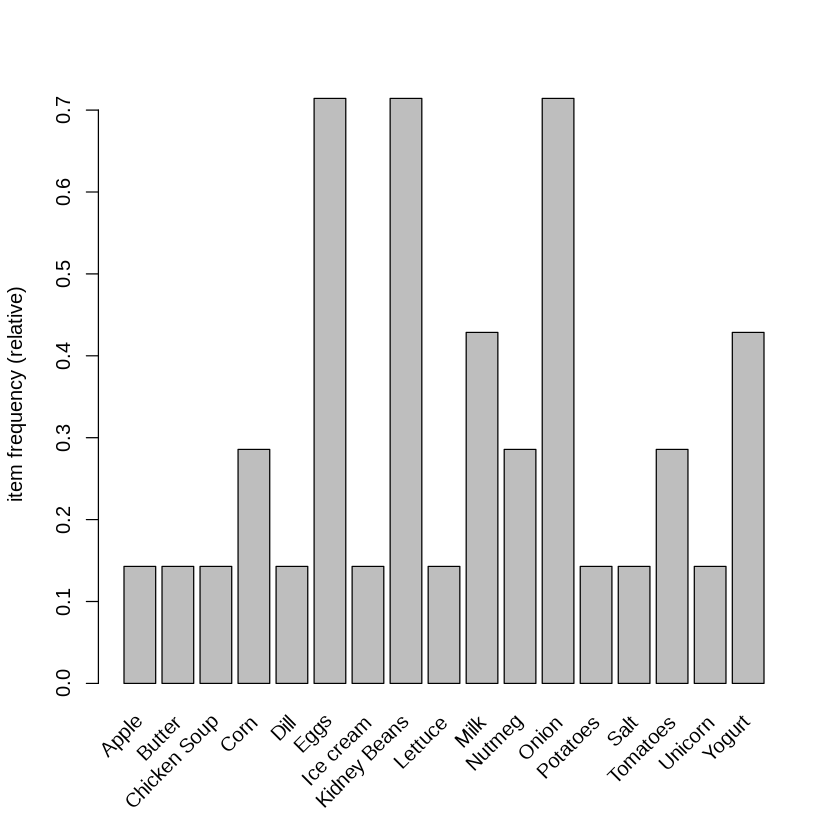

In [ ]:
# Write your code here


**Task**: Use the `arules::item*` functions to plot the absolute frequency of the items.

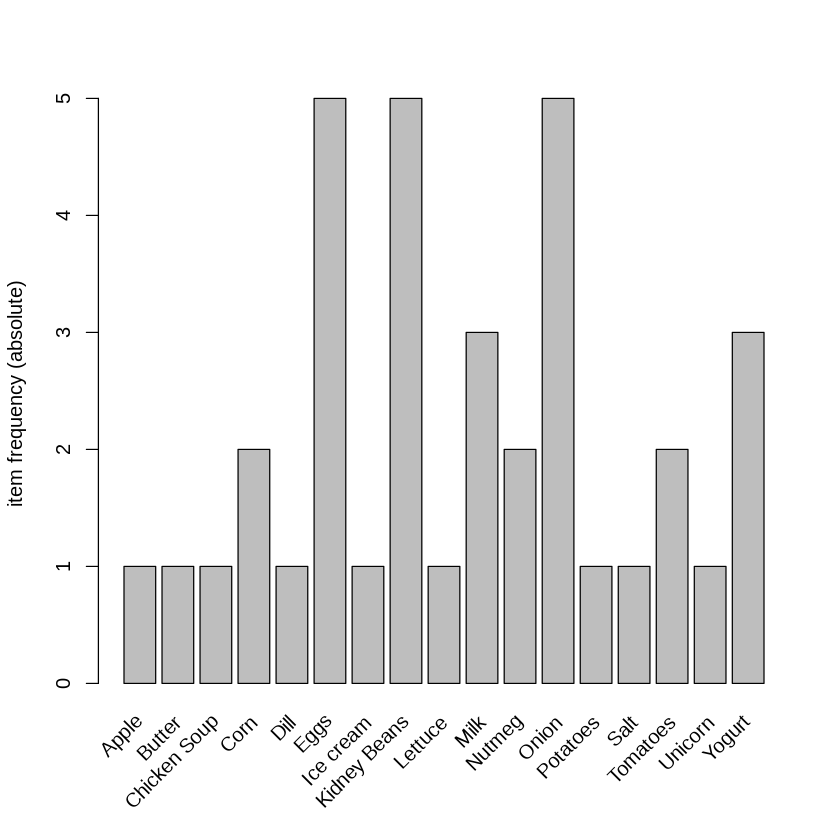

In [ ]:
# Write your code here


**Task**: Use the `arules::item*` functions to plot the (relative) frequency of the items. This time sort the results. Tip: use the `topN` argument.

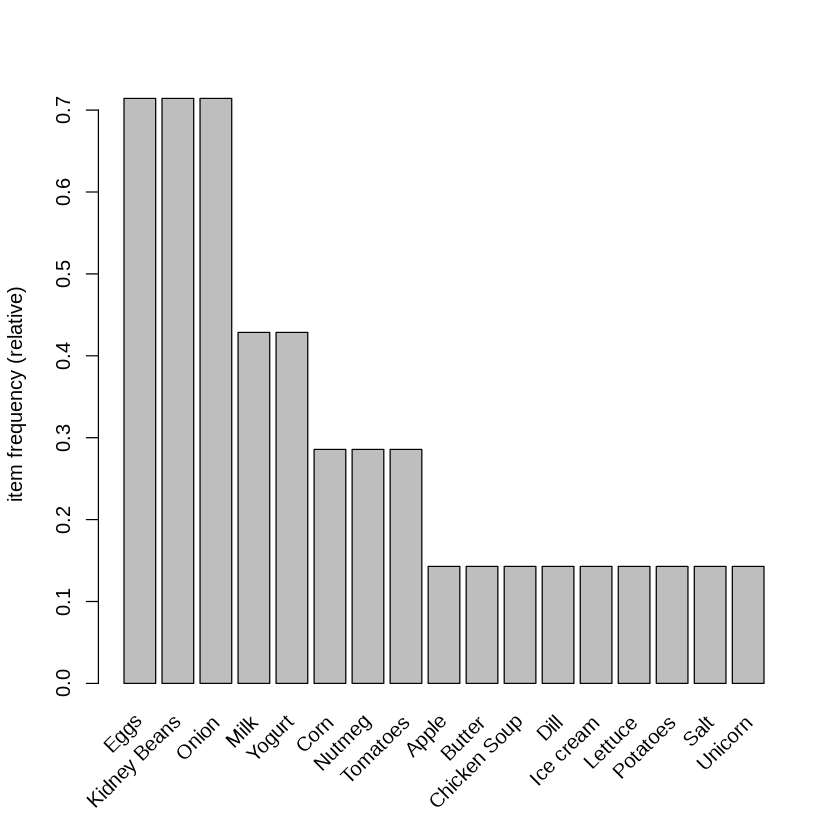

In [ ]:
# Write your code here


## Task 2

![](https://image.slidesharecdn.com/rmining-131226022318-phpapp01/95/rmining-18-1024.jpg?cb=1388024663)

**Task**: Use the `apriori` function to calculate the itemsets of the transactions. Notice: the argument `parameter=list(target='frequent')` must be specified.

In [ ]:

toy.itemsets <- apriori(# Write your code here)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 7 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [221 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


**Task**: Inspect the `itemsets` with summary.

In [ ]:
# Write your code here


set of 221 itemsets

most frequent items:
       Onion Kidney Beans         Eggs       Yogurt         Milk      (Other) 
          96           75           70           60           48          324 

element (itemset/transaction) length distribution:sizes
 1  2  3  4  5  6 
17 55 75 52 19  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.045   4.000   6.000 

summary of quality measures:
    support           count      
 Min.   :0.1429   Min.   :1.000  
 1st Qu.:0.1429   1st Qu.:1.000  
 Median :0.1429   Median :1.000  
 Mean   :0.1816   Mean   :1.271  
 3rd Qu.:0.1429   3rd Qu.:1.000  
 Max.   :0.7143   Max.   :5.000  

includes transaction ID lists: FALSE 

mining info:
              data ntransactions support confidence
 dataset.toy.trans             7     0.1          1
                                                                     call
 apriori(data = dataset.toy.trans, parameter = list(target = "frequent"))

**Task**: Inspect the itemsets with `inspect`, combine it with `head` to limit the amount of rules being displayed.

In [ ]:
# Write your code here


    items       support   count
[1] {Lettuce}   0.1428571 1    
[2] {Apple}     0.1428571 1    
[3] {Ice cream} 0.1428571 1    
[4] {Unicorn}   0.1428571 1    
[5] {Salt}      0.1428571 1    
[6] {Potatoes}  0.1428571 1    


**Task**: Sort the itemsets to show the ones with the highest support.

In [ ]:
# Write your code here


    items                support   count
[1] {Eggs}               0.7142857 5    
[2] {Kidney Beans}       0.7142857 5    
[3] {Onion}              0.7142857 5    
[4] {Eggs, Kidney Beans} 0.5714286 4    
[5] {Eggs, Onion}        0.5714286 4    
[6] {Milk}               0.4285714 3    


**Task**: Given that the number of itemsets can grow exponentially, let's use the `minlen = 2` and `maxlen = 4` to reduce the number of sets.

In [ ]:
# Write your code here


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target  ext
      4 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 7 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(dataset.toy.trans, parameter = list(target = "frequent", :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [182 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


**Task**: Now, inspect the smallest itemsets.

In [ ]:
# Write your code here


    items                 support   count
[1] {Lettuce, Tomatoes}   0.1428571 1    
[2] {Eggs, Lettuce}       0.1428571 1    
[3] {Lettuce, Onion}      0.1428571 1    
[4] {Apple, Milk}         0.1428571 1    
[5] {Apple, Eggs}         0.1428571 1    
[6] {Apple, Kidney Beans} 0.1428571 1    


## Task 3

**Tasks**: Plot each itemsets providing the `method = 'graph'` argument

Warning message:
“Too many itemsets supplied. Only plotting the best 100 using ‘support’ (change control parameter max if needed).”


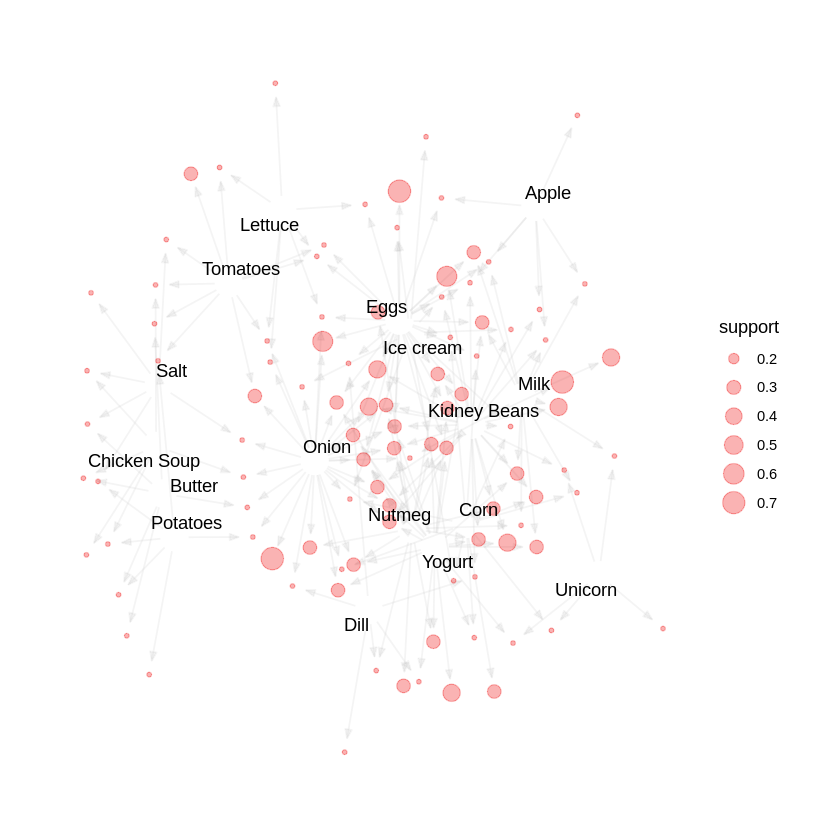

In [ ]:
# Write your code here


## Task 4

**Task**: Use the `apriori` function to create rules. specify supp = 0.1, conf = 0.8

In [ ]:
# Write your code here
toy.rules <-

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 7 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [482 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 482 rules 

**Task**: Create set of rules that has support > 0.15 and confidence > 0.9.

In [ ]:
# Write your code here
toy.rules2 <-apriori

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.15      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 7 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [52 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 52 rules 